Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°1** 
##**Tema**: Hill Climbing##

Integrantes: Herrera, Franco Nahuel

## Ejercicio 1
El siguiente código es una implementación simple del algoritmo Hill Climbing, al cual le faltan algunas líneas para funcionar correctamente. Su trabajo consiste en completar el código y probar el algoritmo con una función de prueba (Benchmark).

In [ ]:
import random
import math

def HillClimbing(fitness, X_mejor, max_eps, bounds, cant_iterac):
    """Método de Hill Climbing.

    Parametros
    ----------
    fitness : function
        Funcion de evaluacion a optimizar
    X_mejor: list
        Vector solucion inicial, desde donde parte la exploracion.
    max_eps: float
        Valor de distancia maxima del paso a recorrer en cada iteracion.
    bounds: list(tuple)
        Matriz de tamano nx2, donde n es la cantidad de variables que 
        tiene el problema (cantidad de coordenadas del vector solución). 
        En la primera columna se establecen los valores limites inferiores y 
        en la segunda columna se establece los valores limite superiores.
        Observen que los valores de la primera columna siempre deben ser 
        menores que los de la segunda).
    cant_iterac: integer
        Cantidad de iteraciones usada como condicion de terminacion.

    Retorno
    -------
    X_mejor : list
        Vector solución correspondiente a la mejor solución encontrada.
    fX_mejor : list
        Valor de evaluación de la mejores solución encontrada.
    Trace_R : list
        Lista con los vectores dirección calculados en cada iteración.
    Trace_X : list
        Lista con las soluciones calculadas en cada iteración.
    Trace_X_mejor : list
        Lista con las mejores soluciones de cada iteración.
    Trace_f : list
        Lista con los valores de evaluación de la mejor y peor solución.
    """
    
    fX_mejor = 0
    Trace_R = []
    Trace_X = []
    Trace_X_mejor = []
    Trace_f = []
    
    if len(X_mejor) == 0:
        print ('La solucion inicial debe tener al menos una variable.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    
    if len(bounds) != len(X_mejor) or len(bounds[0]) != 2:
        print('La matriz de Bounds tiene un tamaño incorrecto.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f

    if cant_iterac < 1:
        print('El número máximo de iteraciones debe ser positivo mayor a cero.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    
    if max_eps <= 0:
        print('El tamaño del paso debe ser real y positivo.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f

    # evaluacion inicial 
    fX_mejor = fitness(X_mejor)

    # inicializar variables
    Trace_R.append([0 for xi in X_mejor]);
    Trace_X.append(X_mejor);
    Trace_X_mejor.append(X_mejor);
    Trace_f.append((fX_mejor,fX_mejor))
    it = 0
    cnt = 0
    sigue = True
    
    # repetir hasta que se cumpla la condicion de terminacion
    while sigue:
        #  calculo el punto de exploracion
        X, R = puntoExploracion(X_mejor, max_eps)

        # verifico y corrijo que X este dentro del dominio
        for i, xi in enumerate(X):
            X[i] = bounds[i][0] if xi < bounds[i][0] else xi
            X[i] = bounds[i][1] if xi > bounds[i][1] else xi

        # evaluo solucion
        fX0 = fX_mejor
        fX = fitness(X)
        
        # si la solucion actual es mejor que la que ya tenía
        if fX >= fX_mejor:
            X_mejor = X
            fX_mejor = fX
            cnt = 0
        else:
            cnt = cnt + 1
        
        # condicion de terminacion
        if cnt > cant_iterac:
            sigue = False
        
        # guardo valores para analisis posterior
        Trace_R.append(R)
        Trace_X.append(X)
        Trace_X_mejor.append(X_mejor)
        Trace_f.append((max(fX, fX0), min(fX, fX0)))
        
        # incremento el tiempo
        it = it + 1

        # imprimir solo si obtuve una mejor solucion
        if fX >= fX0:
            print("It.{0}: {1} -> {2}".format(it, 
                [round(xi,2) for xi in X], round(fX_mejor,4)))
        
    return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def graficarEvolucionFitness(trace_f):
    """Método para graficar la evolucion del fitness con las iteraciones.
    Parametros
    ----------
    trace_f : list
        Lista con los valores de evaluación de la mejor y peor solución.
    """
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, 10, 1000)
    x = [i for i in range(len(trace_f))];
    best = [t[0] for t in trace_f];
    worst = [t[1] for t in trace_f];
    plt.plot(x, best, label='Mejor solución');
    plt.plot(x, worst, label='Peor solución');
    
    # Add title and axis names
    plt.title('Valores de Evaluación')
    plt.xlabel('Iteración')
    plt.ylabel('Fitness')
    plt.grid()
    plt.legend()

def graficarCaminata(fitness, solutions,  bounds, resolution, alpha=0.5):
    """Graficar la funcion de evaluacion y las soluciones encontradas.
    Parametros
    ----------
    fitness : function
        Función de evaluación a optimizar
    solutions : list
        Lista de soluciones encontradas con método de optimización.
    bounds: list(tuple)
        Matriz de tamano nx2, donde n es la cantidad de variables que 
        tiene el problema (cantidad de coordenadas del vector solución). 
    resolution : float
        Resolución para graficar la función. Tomar un valor Mayor a 0.1.
    alpha : float
        Transparencia para el grafico de la función.
    """
    if len(bounds) == 1:
        fig = plt.figure()
        ax = fig.gca()
        
        ranges = []
        for i in range(len(bounds)):
            steps = round((bounds[i][1] - bounds[i][0]) / resolution)
            ranges.append([bounds[i][0] + s*resolution for s in range(steps)])
    
        X = []; Y = []
        for i, xi in enumerate(ranges[0]):
            X.append(xi)
            Y.append(fitness([xi]))

        # Plot the line.
        plt.plot(X, Y, antialiased=False, alpha=alpha)
        
        # Add title and axis names
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid()

        x = [s[0] for s in solutions]
        y = [fitness(s) for s in solutions]
        
        ax.scatter(x, y, c='k', marker='o')
        
    elif len(bounds) == 2:
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        ranges = []
        for i in range(len(bounds)):
            steps = round((bounds[i][1] - bounds[i][0]) / resolution)
            ranges.append([bounds[i][0] + s*resolution for s in range(steps)])

        X = []; Y = []; Z = []
        for i, xi in enumerate(ranges[0]):
            x_row = []; y_row = []; z_row = []
            for j, yj in enumerate(ranges[1]):
                x_row.append(xi)
                y_row.append(yj)
                z_row.append(fitness([xi, yj]))
            X.append(x_row)
            Y.append(y_row)
            Z.append(z_row)

        # Plot the surface.
        surf = ax.plot_surface(X, Y, np.array(Z), cmap=cm.coolwarm, linewidth=0, 
            antialiased=False, alpha=alpha)
        
        # Add title and axis names
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_zlabel('f(x,y)')

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)
        
        x = [s[0] for s in solutions]
        y = [s[1] for s in solutions]
        z = [fitness(s)+1 for s in solutions]
        
        ax.scatter(x, y, z, c='k', marker='o')
        ax.view_init(elev=40., azim=60)
        
    else: 
        print("No implementado para más de dos variables.")

La siguiente función calcula un nuevo punto de exploración a partir de un vector solución dado. La función es utilizada en el método de Hill Climbing.

In [ ]:
import random
import math
def puntoExploracion(X0, max_eps):
    """Calcular un nuevo punto de exploración o solución, a partir de
    una solución previa.

    Parameters
    ----------
    X0: list
        Vector solucion inicial.
    max_eps: float
        Valor del tamaño máximo del paso.
    
    Returns
    -------
    X : list
        Vector solución generado.
    R : list
        Vector dirección.
    """

    R1 = [2*random.random()-1 for i in range(len(X0))]
    norma = math.sqrt(sum([ri**2 for ri in R1]))
    R = [ri/norma for ri in R1]
    e = random.random()*max_eps
    X = []
    for i in range(len(X0)):
      X.append(X0[i]+e*R[i])
    return X, R

Ploteo de Prueba:

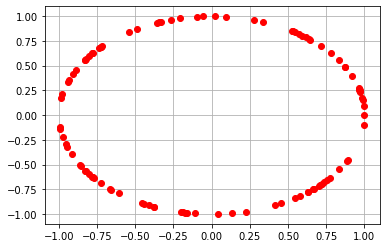

In [ ]:
import matplotlib.pyplot as plt
X0 = [1,7]
max_eps = 0.2
iter = 100
P = []
for i in range(iter):
  X,R = puntoExploracion(X0,max_eps)
  P.append(R)

x = [x[0] for x in P]
y = [y[1] for y in P]

plt.plot(x,y,'ro')
plt.grid()
plt.show()


Probar el algoritmo con el siguiente fragmento de código:

It.1: [5] -> -25
It.2: [5] -> -25
It.3: [4.98] -> -24.8216
It.5: [4.77] -> -22.7091
It.7: [4.64] -> -21.5255
It.13: [4.17] -> -17.3934
It.14: [3.85] -> -14.7994
It.15: [3.71] -> -13.7804
It.16: [3.63] -> -13.1682
It.18: [3.54] -> -12.547
It.20: [3.19] -> -10.156
It.22: [2.96] -> -8.7682
It.25: [2.72] -> -7.4227
It.26: [2.44] -> -5.9553
It.30: [2.28] -> -5.2126
It.31: [2.26] -> -5.0862
It.32: [2.23] -> -4.9812
It.33: [2.04] -> -4.1449
It.35: [1.86] -> -3.4655
It.38: [1.38] -> -1.8976
It.39: [1.31] -> -1.7099
It.41: [0.84] -> -0.7059
It.42: [0.61] -> -0.3751
It.46: [0.58] -> -0.3393
It.53: [0.34] -> -0.1124
It.54: [0.18] -> -0.0323
It.55: [-0.01] -> -0.0001
-----
Solución: [-0.009907904906760079]
Fitness: -9.816657964140045e-05
Iteraciones: 76


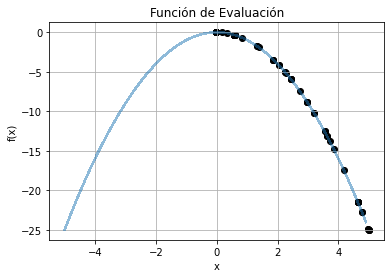

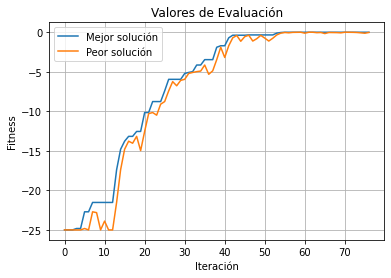

In [ ]:
def parabola(x_vars):
    return -sum([x**2 for x in x_vars])
         
n_variables = 1
bounds = [(-5,5) for i in range(n_variables)]
x0 = [row[1] for row in bounds] # punto inicial en una de las esquinas
max_eps = 0.5
cant_iterac = 20
resolution_grafico = 0.1

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = HillClimbing(
    parabola, x0, max_eps, bounds, cant_iterac)

print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))

graficarCaminata(parabola, Trace_X_mejor, bounds, resolution_grafico)
graficarEvolucionFitness(Trace_f)

## Ejercicio 2

Reutilizando el código anterior, compruebe el funcionamiento del algoritmo buscando un óptimo local en los siguientes casos:
1.   F(x, y) = -x^2 - y^2, x, y ∈ [-5, 5]
2.   g(x)= -0.01 x^2 - cos(2x), x ∈ [-4𝜋, 4𝜋]
3.   G(x, y) = -0.01(x^2+y^2)-cos(2x)-cos(2y), x,y ∈ [-4𝜋, 4𝜋]

En cada caso se pide:
1.   Ajuste adecuadamente los parámetros del algoritmo (tamaño máximo del paso y cantidad de iteraciones), de manera de asegurar que encuentre un óptimo local independientemente de cuál sea el punto inicial, en más del 80% de las ejecuciones. Considere dos cifras decimales de precisión para determinar que llegó al óptimo.
2.    Genere un gráfico con la “caminata” realizada, es decir donde se muestre todos los puntos por donde el algoritmo fue explorando, desde el punto inicial hasta llegar a la solución final.
3.    Generar un gráfico con los valores de fitness de las soluciones encontradas en cada iteración del algoritmo.

It.1: [5.0, 5.0] -> -49.9331
It.3: [4.82, 4.77] -> -45.917
It.7: [4.77, 4.73] -> -45.1251
It.9: [4.77, 4.54] -> -43.337
It.10: [4.65, 4.65] -> -43.2245
It.11: [4.24, 4.41] -> -37.455
It.12: [4.16, 4.4] -> -36.5959
It.15: [4.16, 4.36] -> -36.3746
It.16: [3.79, 4.4] -> -33.7392
It.20: [3.35, 4.61] -> -32.4541
It.23: [3.27, 4.43] -> -30.2689
It.27: [3.15, 4.5] -> -30.188
It.28: [3.09, 4.53] -> -30.1046
It.30: [2.99, 4.56] -> -29.73
It.32: [3.05, 4.07] -> -25.8975
It.33: [2.91, 4.0] -> -24.4478
It.34: [2.45, 3.91] -> -21.2999
It.35: [2.37, 3.96] -> -21.2825
It.36: [2.12, 3.64] -> -17.737
It.37: [1.95, 3.52] -> -16.2035
It.38: [1.93, 3.48] -> -15.8514
It.41: [1.84, 3.39] -> -14.882
It.44: [1.89, 2.97] -> -12.3962
It.45: [1.75, 2.58] -> -9.7594
It.48: [1.7, 2.6] -> -9.6655
It.51: [1.77, 2.5] -> -9.3941
It.55: [1.28, 2.5] -> -7.8828
It.56: [1.33, 2.27] -> -6.895
It.60: [1.35, 2.25] -> -6.8926
It.62: [1.35, 2.17] -> -6.5506
It.63: [1.32, 1.86] -> -5.1967
It.64: [1.56, 1.48] -> -4.6328
It.67: [

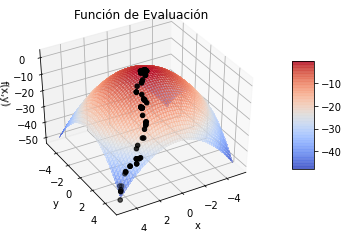

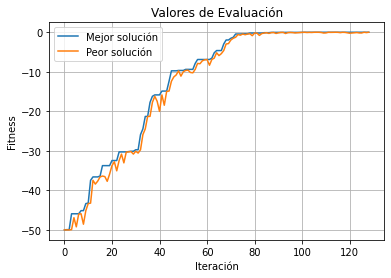

In [ ]:
import math
def f(X_vars):
    return -sum( [xi**2 for xi in X_vars] )

n_variables = 2
bounds_F = [(-5,5) for i in range(n_variables)]
x0 = [row[1] for row in bounds_F] # punto inicial en una de las esquinas
max_eps = 0.5
cant_iterac = 20
resolution_grafico = 0.1

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = HillClimbing(
    f, x0, max_eps, bounds_F, cant_iterac)

print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))

graficarCaminata(f, Trace_X_mejor, bounds_F, resolution_grafico)
graficarEvolucionFitness(Trace_f)

It.1: [12.51] -> -2.5578
It.2: [12.03] -> -1.9167
It.5: [11.98] -> -1.8258
It.6: [11.55] -> -0.885
It.8: [11.46] -> -0.7102
It.10: [11.09] -> -0.2502
It.13: [11.02] -> -0.2165
It.26: [10.91] -> -0.2053
It.32: [10.96] -> -0.2042
It.34: [10.96] -> -0.2034
-----
Solución: [10.955022249657771]
Fitness: -0.203412258007444
Iteraciones: 55


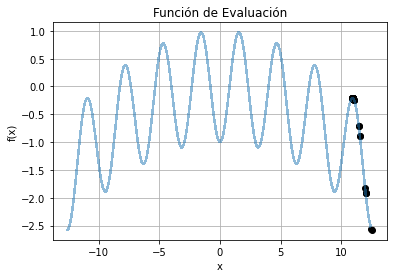

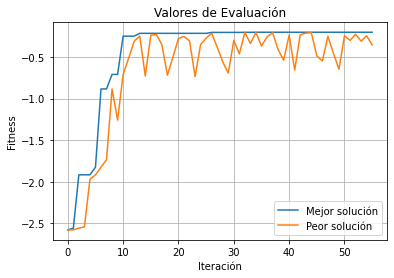

In [ ]:
import math
def g(X_vars):
    return -0.01 * sum([xi**2 for xi in X_vars]) - sum([math.cos(2*xi) for xi in X_vars])

bounds_G = [(-4*math.pi, 4*math.pi)]

x0 = [row[1] for row in bounds_G] # punto inicial en una de las esquinas
max_eps = 0.5
cant_iterac = 20
resolution_grafico = 0.1

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = HillClimbing(
    g, x0, max_eps, bounds_G, cant_iterac)

print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))

graficarCaminata(g, Trace_X_mejor, bounds_G, resolution_grafico)
graficarEvolucionFitness(Trace_f)

It.1: [12.47, 12.5] -> -5.087
It.3: [12.19, 12.1] -> -4.2743
It.4: [12.39, 11.93] -> -4.1928
It.7: [11.99, 11.68] -> -3.0038
It.9: [11.97, 11.66] -> -2.921
It.10: [11.67, 11.26] -> -1.5466
It.11: [11.67, 11.21] -> -1.4958
It.13: [11.54, 11.12] -> -1.1359
It.14: [11.36, 11.27] -> -0.9634
It.16: [10.97, 11.47] -> -0.9404
It.18: [10.88, 11.09] -> -0.4562
It.29: [10.9, 11.07] -> -0.4441
It.36: [10.88, 11.05] -> -0.4374
It.40: [11.0, 10.84] -> -0.4344
It.42: [10.96, 10.86] -> -0.4193
It.61: [11.01, 10.94] -> -0.4156
It.68: [10.96, 10.99] -> -0.4122
It.81: [10.96, 10.95] -> -0.4072
It.100: [10.94, 10.94] -> -0.4061
It.157: [10.94, 10.94] -> -0.4061
It.163: [10.94, 10.94] -> -0.406
It.234: [10.94, 10.94] -> -0.406
-----
Solución: [10.941607714407386, 10.939048030929449]
Fitness: -0.406018273540518
Iteraciones: 335


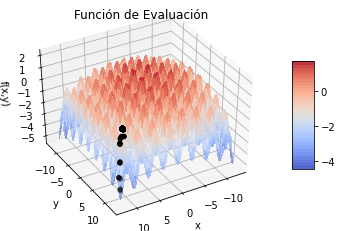

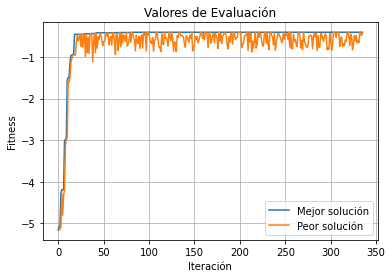

In [ ]:
import math

def h(X_vars):
    return -0.01 * sum([xi**2 for xi in X_vars]) - sum([math.cos(2*xi) for xi in X_vars])

bounds_H = [(-4*math.pi, 4*math.pi) for i in range (2)]

x0 = [row[1] for row in bounds_H] # punto inicial en una de las esquinas
max_eps = 0.5
cant_iterac = 100
resolution_grafico = 0.1

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = HillClimbing(
    h, x0, max_eps, bounds_H, cant_iterac)

print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))

graficarCaminata(h, Trace_X_mejor, bounds_H, resolution_grafico)
graficarEvolucionFitness(Trace_f)
